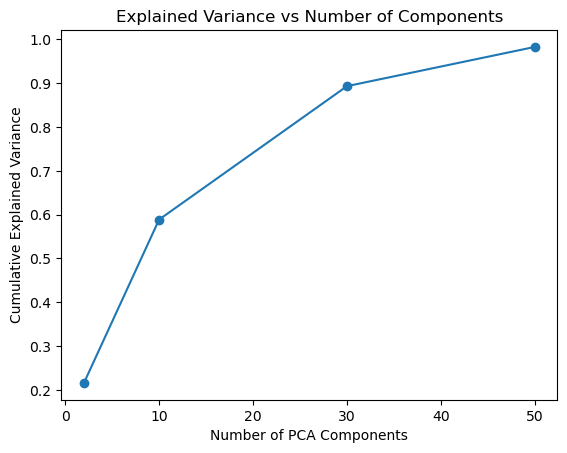

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data      # already flattened (1797 x 64)
y = digits.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


components = [2, 10, 30, 50]
explained_variance = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance[n] = np.sum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(components, explained_variance.values(), marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.show()


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred)

pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = lr_pca.predict(X_test_pca)
pca_accuracy = accuracy_score(y_test_pca, y_pred_pca)
print("Accuracy (Original Data):", original_accuracy)
print("Accuracy (PCA Reduced Data):", pca_accuracy)


Accuracy (Original Data): 0.9722222222222222
Accuracy (PCA Reduced Data): 0.9611111111111111


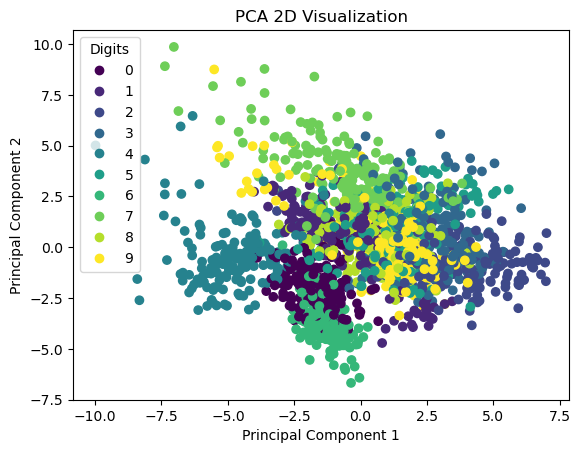

In [3]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Visualization")
plt.legend(*scatter.legend_elements(), title="Digits")
plt.show()
